# 0. 목표
- 손글씨를 분류하는 모델을 만들어보자.
- 예측의 불확실성을 확인해보자.
- 이미지 데이터에 형태를 이해
- 다양한 분류 평가 지표를 이해하자.

# 1. 데이터 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
digit_train = pd.read_csv('./data/digit_train.csv')
digit_test = pd.read_csv('./data/digit_test.csv')
digit_sample_submission = pd.read_csv('./data/digit_sample_submission.csv')
print(digit_train.head())
print(digit_test.head())
# 색상체계 종류 : RGB, CMYK

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
# 이미지 확인
img = digit_train.iloc[0, 1:]
print(img)

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64


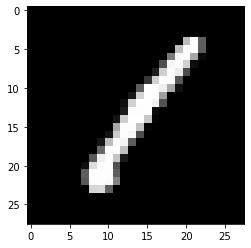

In [4]:
img_reshape = img.values.reshape(28,28)
plt.imshow(img_reshape, cmap='gray')

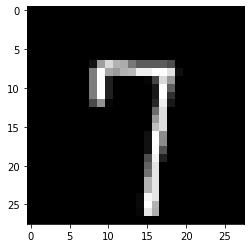

In [6]:
img = digit_train.iloc[50, 1:]
img_reshape = img.values.reshape(28,28)
plt.imshow(img_reshape, cmap='gray')

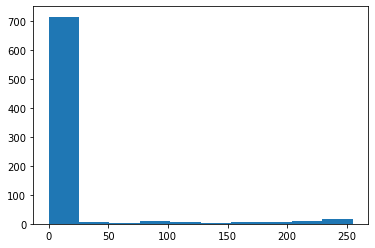

In [7]:
# 데이터 분포 확인
plt.hist(img)
plt.show()

In [12]:
# 손글씨(정답) 종류
digit_train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

## 2.1 훈련용 데이터와 검증용 데이터 분리

In [16]:
X = digit_train.iloc[:,1:]
y = digit_train.iloc[:,0]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=721)

## 2.2 모델링
- KNN
- DecisionTree
- LogisticRegression
- SGDClassifier
- SVM

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier # 경사 하강법 적용 선형 분류 모델
from sklearn.svm import LinearSVC            # 분류용 SVM 모델

In [30]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
knn_score = knn_model.score(X_test,y_test)
print('knn_모델 결과 :',knn_score)

knn_모델 결과 : 0.9647619047619047


In [31]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_score = dt_model.score(X_test,y_test)
print('DecisionTree 모델 결과 :',dt_score)

DecisionTree 모델 결과 : 0.8557142857142858


In [32]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_score = lr_model.score(X_test,y_test)
print('LinearRegression 모델 결과 :',lr_score)

LinearRegression 모델 결과 : 0.9136507936507936


C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train,y_train)
sgd_score = sgd_model.score(X_test,y_test)
print('SGD 모델 결과 :',sgd_score)

SGD 모델 결과 : 0.8688888888888889


In [29]:
l_svc = LinearSVC()
l_svc.fit(X_train,y_train)
l_svc_score = l_svc.score(X_test,y_test)
print('LinearSVC 모델 결과 :',l_svc_score)

LinearSVC 모델 결과 : 0.8538095238095238


C:\Users\AI\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## 2.3 교차 검증 활용 점수 확인

In [34]:
from sklearn.model_selection import cross_val_score
knn_cv_score = cross_val_score(knn_model,X,y, cv=3).mean()
print('KNN 교차 검증 평균 점수 :', knn_cv_score)
dt_cv_score = cross_val_score(dt_model,X,y, cv=3).mean()
print('DecisionTree 교차 검증 평균 점수 :', dt_cv_score)
lr_cv_score = cross_val_score(lr_model,X,y, cv=3).mean()
print('LinearRegression 교차 검증 평균 점수 :', lr_cv_score)
sgd_cv_score = cross_val_score(sgd_model,X,y, cv=3).mean()
print('SGD 교차 검증 평균 점수 :', sgd_cv_score)
l_svc_cv_score = cross_val_score(l_svc,X,y, cv=3).mean()
print('LinearSVC 교차 검증 점수 :', l_svc_cv_score)

KNN 교차 검증 평균 점수 : 0.9642142857142857
DecisionTree 교차 검증 평균 점수 : 0.846


C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LinearRegression 교차 검증 평균 점수 : 0.9128095238095238
SGD 교차 검증 평균 점수 : 0.8678571428571429


C:\Users\AI\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC 교차 검증 점수 : 0.8635


C:\Users\AI\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## 2.4 스케일링 추가
- minmax 스케일러 활용
    - 모든 스케일링의 결과가 0과 1 사이의 값으로 바뀜

In [47]:
from sklearn.preprocessing import MinMaxScaler

mM_scaler = MinMaxScaler() # 스케일러 객체 생성
mM_scaler.fit(X) # 스케일링 기준값 찾기
X_train_scaled = mM_scaler.transform(X) # 스케일링 실시
X_test_scaled = mM_scaler.transform(digit_test)
knn_model2 = KNeighborsClassifier()
dt_model2 = DecisionTreeClassifier()
lr_model2 = LogisticRegression()
sgd_model2 = SGDClassifier()
l_svc_model2 = LinearSVC()

In [48]:
knn_score2 = cross_val_score(knn_model2, X_train_scaled, y, cv=3).mean()
dt_score2 = cross_val_score(dt_model2, X_train_scaled, y, cv=3).mean()
lr_score2 = cross_val_score(lr_model2, X_train_scaled, y, cv=3).mean()
sgd_score2 = cross_val_score(sgd_model2, X_train_scaled, y, cv=3).mean()
l_svc_score2 = cross_val_score(l_svc_model2, X_train_scaled, y, cv=3).mean()

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [49]:
print('스케일링 후, KNN 교차 검증 평균 점수 :', knn_score2)
print('스케일링 후, DecisionTree 교차 검증 평균 점수 :', dt_score2)
print('스케일링 후, LogisticRegression 교차 검증 평균 점수 :', lr_score2)
print('스케일링 후, SGD 교차 검증 평균 점수 :', sgd_score2)
print('스케일링 후, LinearSVC 교차 검증 평균 점수 :', l_svc_score2)

스케일링 후, KNN 교차 검증 평균 점수 : 0.9641904761904762
스케일링 후, DecisionTree 교차 검증 평균 점수 : 0.8476666666666667
스케일링 후, LogisticRegression 교차 검증 평균 점수 : 0.9162857142857144
스케일링 후, SGD 교차 검증 평균 점수 : 0.909904761904762
스케일링 후, LinearSVC 교차 검증 평균 점수 : 0.9077380952380952


# 3. 예측의 불확실성 확인
- 분류 모델들은 예측 결과를 정하기 전에 항상 확률을 계산한다.
- 분류 모델이 예측한 값이 같더라도 확신의 정도(불확실성)가 전부 다르다.

In [54]:
logi_model3 = LogisticRegression()
logi_model3.fit(X_train, y_train)
pre = logi_model3.predict(X_test)

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
print(pre)

[3 0 7 ... 8 5 1]


In [57]:
# pre_proba : 확률 값으로 예상
pre_proba = logi_model3.predict_proba(X_test)
print(pre_proba[0]) # 각 클래스(숫자 0 ~ 9) 숫자 만큼 확률을 계산하여 출력
# 68% 확률로 7/ 27%에 대해
# e-숫자 : q부동 소수점 표현 방식. 앞의 소수에 10^(숫자)

[3.49752736e-09 2.58958531e-08 2.84410005e-03 8.36092622e-01
 2.10550737e-10 1.56267924e-01 1.28625232e-05 3.87976127e-07
 4.78207269e-03 9.92384725e-10]


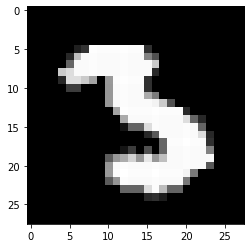

In [75]:
plt.imshow(X_test.iloc[0].values.reshape(28,28), cmap='gray') # 정답

In [ ]:
# 4. 모델 활용하기


In [58]:
!pip install pillow

In [59]:
from PIL import Image

In [60]:
img = Image.open('./data/2.jpg').convert('L') # 사진을 열어서 흑백 채녈로 변경

In [61]:
np_img = np.array(img) # 모델에 넣을 수 있도록 numpy 배열로 변경
np_img.shape

(28, 28)

In [72]:
sgd_model.predict_proba(np_img.reshape(1, 784)) # 학습데이터처럼 1차원으로 사진 펴주기

AttributeError: probability estimates are not available for loss='hinge'